In [31]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [114]:
#uploading files
from google.colab import files
files.upload()



{}

In [33]:
#loading a data set

unilever=pd.read_csv('HINDUNILVR.NS.csv')
tcs=pd.read_csv('TCS.NS.csv')
reliance=pd.read_csv('RELIANCE.NS.csv')

In [34]:
#creating a new data frame 
df=pd.DataFrame()
df['Date']=tcs['Date']
df['unilever']=unilever['Adj Close']
df['tcs']=tcs['Adj Close']
df['reliance']=reliance['Adj Close']

In [35]:
df


,Date,unilever,tcs,reliance
0,2017-05-02,863.731445,1040.865601,661.460266
1,2017-05-03,869.222290,1062.411011,661.243042
2,2017-05-04,890.347961,1059.138428,655.379089
3,2017-05-05,887.742126,1054.775024,641.045227
4,2017-05-08,888.626282,1064.751709,637.739258
...,...,...,...,...
1231,2022-04-25,2100.750000,3548.199951,2695.000000
1232,2022-04-26,2148.350098,3546.300049,2775.649902
1233,2022-04-27,2145.100098,3561.199951,2778.350098
1234,2022-04-28,2241.850098,3584.300049,2819.850098


In [36]:
#set date as index
df=df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,unilever,tcs,reliance
Date,,,,
2017-05-02,2017-05-02,863.731445,1040.865601,661.460266
2017-05-03,2017-05-03,869.222290,1062.411011,661.243042
2017-05-04,2017-05-04,890.347961,1059.138428,655.379089
2017-05-05,2017-05-05,887.742126,1054.775024,641.045227
2017-05-08,2017-05-08,888.626282,1064.751709,637.739258
...,...,...,...,...
2022-04-25,2022-04-25,2100.750000,3548.199951,2695.000000
2022-04-26,2022-04-26,2148.350098,3546.300049,2775.649902
2022-04-27,2022-04-27,2145.100098,3561.199951,2778.350098


In [37]:
#deleting date column
df.drop(['Date'],axis=1,inplace=True)
df

,unilever,tcs,reliance
Date,,,
2017-05-02,863.731445,1040.865601,661.460266
2017-05-03,869.222290,1062.411011,661.243042
2017-05-04,890.347961,1059.138428,655.379089
2017-05-05,887.742126,1054.775024,641.045227
2017-05-08,888.626282,1064.751709,637.739258
...,...,...,...
2022-04-25,2100.750000,3548.199951,2695.000000
2022-04-26,2148.350098,3546.300049,2775.649902
2022-04-27,2145.100098,3561.199951,2778.350098


In [38]:
stocks=df

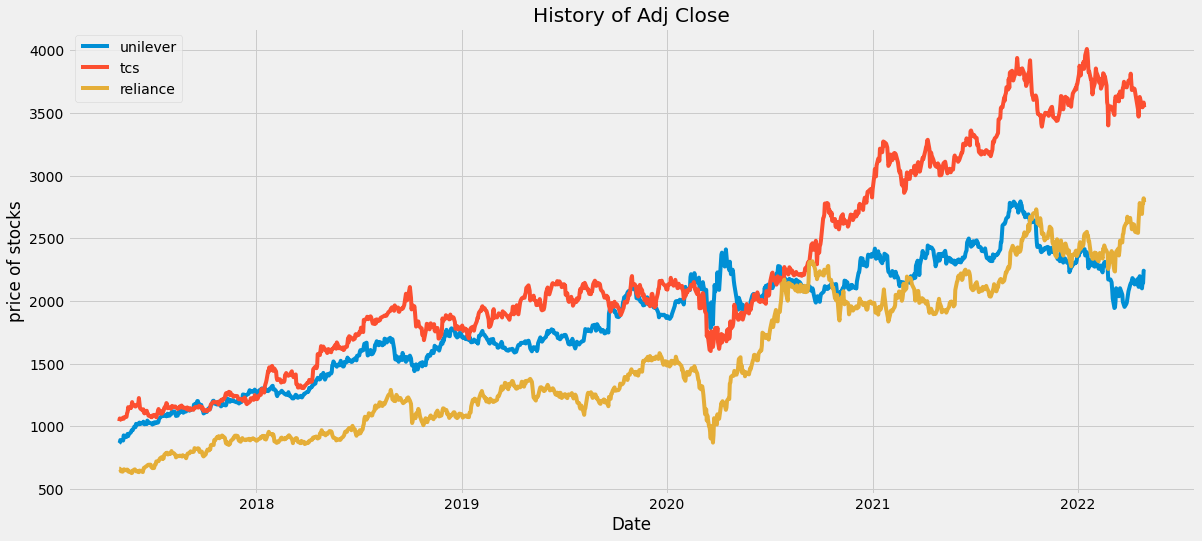

In [39]:
plt.figure(figsize=(18,8))
plt.plot(stocks)
plt.title('History of Adj Close')
plt.xlabel('Date')
plt.ylabel('price of stocks')
plt.legend(stocks.columns.values,loc='upper left')
plt.show()

some of the observation:\
TCS has highest adj close price from starting of 2017
Unilever touches the TCS price in the mid of 2017
While Reliance has the lowest starting among them in mid 2017

In the pandemic period
TCS falls from 2200 to 1600
Unilever falls from 2300 to 1700
Reliance falls from 1500 to 800

by seeing this chart this show us the unilever has not that much affect by the pandemic
end of the pandemic TCS continues perform well compared to Unilever and Reliance



In [40]:
#now let see the daily simple return
daily_returns=stocks.pct_change()
daily_returns

,unilever,tcs,reliance
Date,,,
2017-05-02,NaN,NaN,NaN
2017-05-03,0.006357,0.020700,-0.000328
2017-05-04,0.024304,-0.003080,-0.008868
2017-05-05,-0.002927,-0.004120,-0.021871
2017-05-08,0.000996,0.009459,-0.005157
...,...,...,...
2022-04-25,-0.012318,-0.017813,-0.023126
2022-04-26,0.022659,-0.000535,0.029926
2022-04-27,-0.001513,0.004202,0.000973


In [41]:
#checking correlation
daily_returns.corr()
        

,unilever,tcs,reliance
unilever,1.000000,0.275208,0.327700
tcs,0.275208,1.000000,0.301288
reliance,0.327700,0.301288,1.000000


In [12]:
daily_returns.cov()

,unilever,tcs,reliance
unilever,0.000230,0.000067,0.000098
tcs,0.000067,0.000262,0.000096
reliance,0.000098,0.000096,0.000389


variance show us the how far the data spread to the mean
The higher the variance of an price means the Higher the risk along with high return and volatility
The lower the variance means lower the risk along with lower return and lower volatility
so here variance is 0.000230,0.000262,0.000389 and rest other are covariance 


In [13]:
daily_returns.var()

unilever    0.000230
tcs         0.000262
reliance    0.000389
dtype: float64

so here, Risky asset is the Reliance


In [14]:
#now here we want to see the stock volatility
daily_returns.std()

unilever    0.015159
tcs         0.016178
reliance    0.019720
dtype: float64

Higher volatility means higher return
Reliance will give you the higher return among them


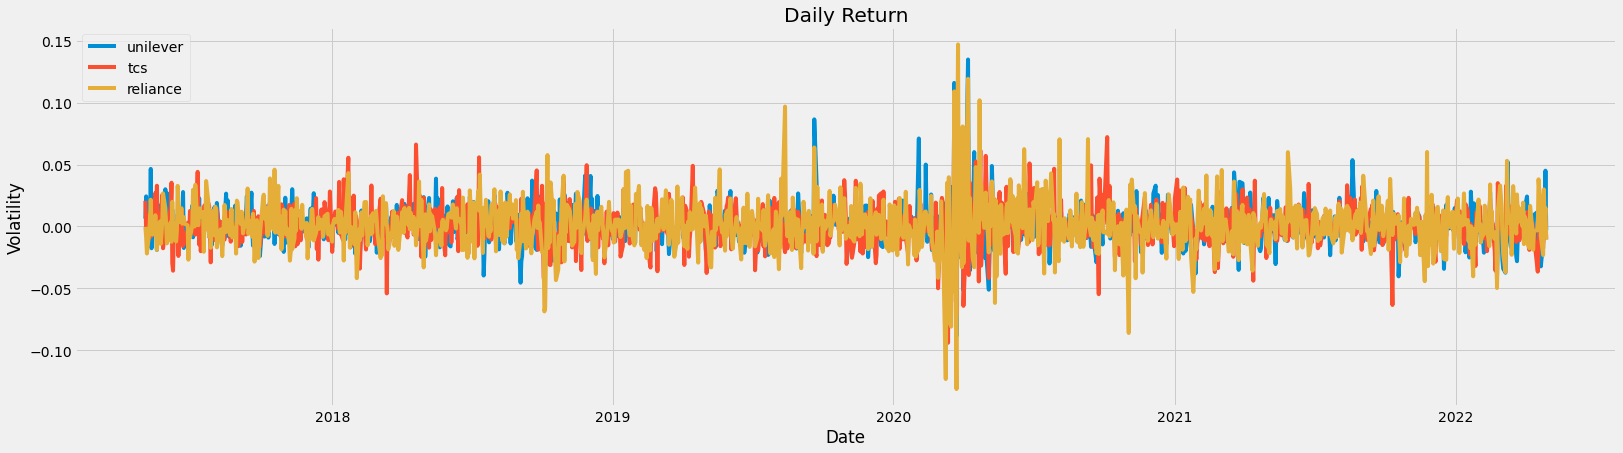

In [42]:
#visualizing the daily simple return
plt.figure(figsize=(24.6,6.5))
 
for i in daily_returns.columns.values:
  plt.plot(daily_returns[i],label=i)

plt.title('Daily Return')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='upper left')
 

By seeing this graph we can say that reliance is more Volatile

In [43]:
#now let see the daily return
daily_returns_mean=daily_returns.mean()
daily_returns_mean

unilever    0.000884
tcs         0.001124
reliance    0.001360
dtype: float64

No handles with labels found to put in legend.


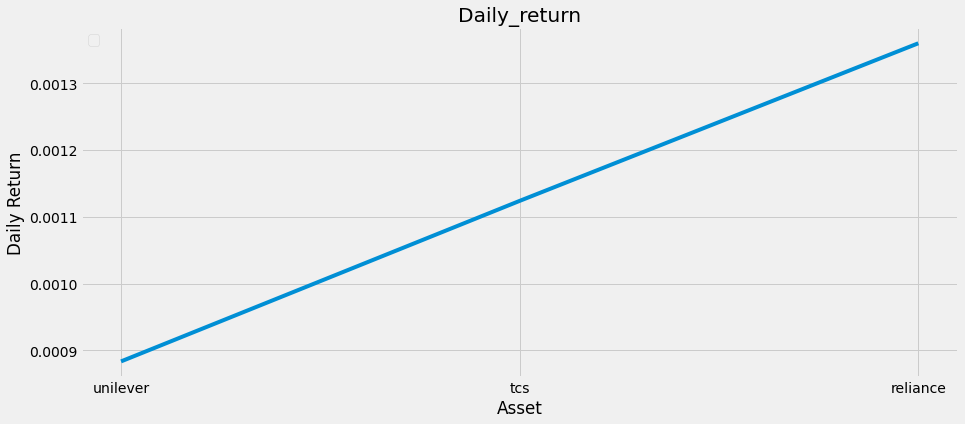

In [44]:
plt.figure(figsize=(14,6))
plt.plot(daily_returns_mean)
plt.title('Daily_return')
plt.xlabel('Asset')
plt.ylabel('Daily Return')
plt.legend(loc='upper left')


Reliance gives the highest daily return

In [45]:
#creating a portfolio such as we are giving weights to all three asset 60% to TCS, 30% to Reliance and 10% to Uniliver
weights=np.array([0.6,0.3,0.1])

portfolio=np.sum(daily_returns_mean*weights)

print('we can expect our daily simple return portfolio:',portfolio)

we can expect our daily simple return portfolio: 0.001003272035392405


In [46]:
#Getting yearly portfolio return
print('Expected annualy return:'+str(portfolio*253))

Expected annualy return:0.25382782495427847


In [47]:
#calculating our growth of investment  by cumulative simple return
growth_of_investment=(daily_returns+1).cumprod()

growth_of_investment

,unilever,tcs,reliance
Date,,,
2017-05-02,NaN,NaN,NaN
2017-05-03,1.006357,1.020700,0.999672
2017-05-04,1.030816,1.017555,0.990806
2017-05-05,1.027799,1.013363,0.969136
2017-05-08,1.028822,1.022948,0.964138
...,...,...,...
2022-04-25,2.432180,3.408893,4.074319
2022-04-26,2.487289,3.407068,4.196246
2022-04-27,2.483527,3.421383,4.200328


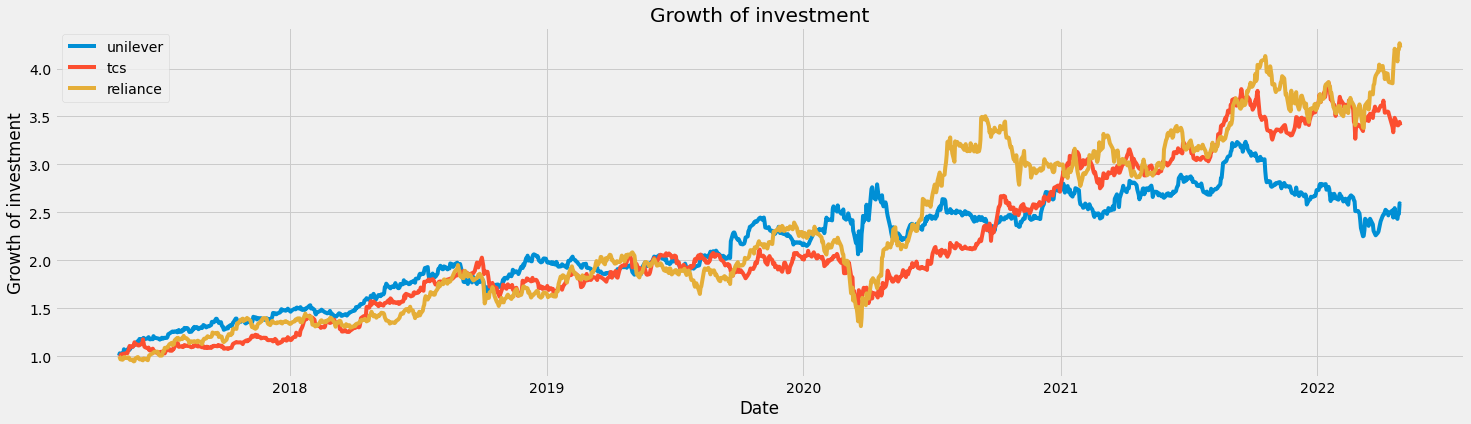

In [48]:
#visualizing our growth of the investment
plt.figure(figsize=(22.5,6))
for i in growth_of_investment.columns.values:
  plt.plot(growth_of_investment.index,growth_of_investment[i],label=i)
plt.title('Growth of investment')
plt.xlabel('Date')
plt.ylabel('Growth of investment')
plt.legend(loc='upper left')  

Reliance Growth of the investment is good among all

In [49]:
#Here we are going to build simple stock moving classifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [50]:
#creating a function of simple moving average (SMA) and Exponential moving average (EmA)
def SMA(reliance,period=30,column='Adj Close'):
  return reliance[column].rolling(window=period).mean()

#creating exponential moving average

def EMA(reliance,period=20,column='Adj Close'):
  return reliance[column].ewm(span=period,adjust=False).mean()


In [51]:
#creating a function of moving average convergence/divergence(MACD)
def MACD(reliance,period_long=26,period_short=12,period_signal=9,column='Adj Close'):
  ShortEMA=EMA(reliance,period=period_short,column=column)
  LongEMA=EMA(reliance,period=period_long,column=column)
  reliance['MACD']=ShortEMA-LongEMA
  reliance['signal']=EMA(reliance,period=period_signal,column=column)
  return reliance

In [60]:
#creata a function of relative strength index(RSI)
def RSI(reliance,period=14,column='Adj Close'):
  delta=reliance[column].diff(1)
  delta=delta.dropna()
  up=delta.copy()
  down=delta.copy()
  up[up<0]=0
  down[down>0]=0
  reliance['up']=up
  reliance['down']=down
  avg_gain=SMA(reliance, period=30, column='up')
  avg_loss=abs(SMA(reliance, period=30, column='down'))
  RS=avg_gain/avg_loss
  RSI=100.0-(100.0/(1.0+RS))

  reliance['RSI']=RSI
  return reliance


In [61]:
#adding indicator to the dataset
MACD(reliance)
reliance['SMA']=SMA(reliance)
reliance['EMA']= EMA(reliance)
RSI(reliance)

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal,SMA,EMA,up,down,RSI
0,2017-05-02,694.417603,694.417603,676.735229,678.840271,661.460266,8579933,0.000000,661.460266,NaN,661.460266,NaN,NaN,NaN
1,2017-05-03,681.985474,683.892395,676.091309,678.617371,661.243042,4384266,-0.017328,661.416821,NaN,661.439578,0.000000,-0.217224,NaN
2,2017-05-04,681.044373,683.322754,670.667725,672.599426,655.379089,6629876,-0.498487,660.209275,NaN,660.862389,0.000000,-5.863953,NaN
3,2017-05-05,674.407288,677.255310,656.279114,657.888855,641.045227,7198681,-2.013224,656.376465,NaN,658.975040,0.000000,-14.333862,NaN
4,2017-05-08,658.755676,663.461060,652.985352,654.496033,637.739258,7414794,-3.440766,652.649024,NaN,656.952584,0.000000,-3.305969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2022-04-25,2742.399902,2758.399902,2663.649902,2695.000000,2695.000000,7874671,60.311390,2676.823255,2577.941667,2624.305046,0.000000,-63.800049,66.138042
1232,2022-04-26,2710.000000,2795.000000,2707.699951,2775.649902,2775.649902,5643066,64.996167,2696.588584,2590.721663,2638.718842,80.649902,0.000000,67.447893
1233,2022-04-27,2755.850098,2828.000000,2755.050049,2778.350098,2778.350098,8924920,68.141279,2712.940887,2603.361670,2652.017057,2.700196,0.000000,67.322987
1234,2022-04-28,2809.949951,2851.000000,2786.100098,2819.850098,2819.850098,11820892,73.139401,2734.322729,2616.728337,2668.001156,41.500000,0.000000,67.961125


In [62]:
#creating a target column to see whether tomarrow Adj close price will high or not if it is high then its indicate us 1 and if not then 0
reliance['target']=np.where(reliance['Adj Close'].shift(-1) > reliance['Adj Close'],1,0)

In [66]:
reliance.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal,SMA,EMA,up,down,RSI,target
0,2017-05-02,694.417603,694.417603,676.735229,678.840271,661.460266,8579933,0.000000,661.460266,NaN,661.460266,NaN,NaN,NaN,0
1,2017-05-03,681.985474,683.892395,676.091309,678.617371,661.243042,4384266,-0.017328,661.416821,NaN,661.439578,0.000000,-0.217224,NaN,0
2,2017-05-04,681.044373,683.322754,670.667725,672.599426,655.379089,6629876,-0.498487,660.209275,NaN,660.862389,0.000000,-5.863953,NaN,0
3,2017-05-05,674.407288,677.255310,656.279114,657.888855,641.045227,7198681,-2.013224,656.376465,NaN,658.975040,0.000000,-14.333862,NaN,0
4,2017-05-08,658.755676,663.461060,652.985352,654.496033,637.739258,7414794,-3.440766,652.649024,NaN,656.952584,0.000000,-3.305969,NaN,1
5,2017-05-09,655.783813,660.563538,653.926453,658.929016,642.058716,9740485,-4.175427,650.530962,NaN,655.534121,4.319458,0.000000,NaN,1


In [67]:
#checking null value
reliance.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
MACD          0
signal        0
SMA          29
EMA           0
up            1
down          1
RSI          30
target        0
dtype: int64

In [68]:
reliance=reliance[30:]
reliance

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal,SMA,EMA,up,down,RSI,target
30,2017-06-13,654.099792,657.269714,649.344849,651.004150,634.336731,2780692,-3.175044,640.115854,644.082530,642.588592,0.000000,-2.461426,42.203091,1
31,2017-06-14,651.771851,673.614807,651.771851,672.376526,655.161926,24431465,-1.794000,643.125068,643.879826,643.786052,20.825195,0.000000,48.437098,1
32,2017-06-15,673.614807,690.950500,673.169006,685.477356,667.927307,13056205,0.326779,648.085516,644.298100,646.085219,12.765381,0.000000,53.114519,1
33,2017-06-16,688.028198,691.346741,678.221130,687.879578,670.268127,15096065,2.171366,652.522038,645.272196,648.388354,2.340820,0.000000,57.712396,1
34,2017-06-19,688.572998,701.252808,688.572998,698.008606,680.137817,7031853,4.379136,658.045194,646.685482,651.412112,9.869690,0.000000,60.814975,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2022-04-25,2742.399902,2758.399902,2663.649902,2695.000000,2695.000000,7874671,60.311390,2676.823255,2577.941667,2624.305046,0.000000,-63.800049,66.138042,1
1232,2022-04-26,2710.000000,2795.000000,2707.699951,2775.649902,2775.649902,5643066,64.996167,2696.588584,2590.721663,2638.718842,80.649902,0.000000,67.447893,1
1233,2022-04-27,2755.850098,2828.000000,2755.050049,2778.350098,2778.350098,8924920,68.141279,2712.940887,2603.361670,2652.017057,2.700196,0.000000,67.322987,1
1234,2022-04-28,2809.949951,2851.000000,2786.100098,2819.850098,2819.850098,11820892,73.139401,2734.322729,2616.728337,2668.001156,41.500000,0.000000,67.961125,0


In [69]:
reliance.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MACD         0
signal       0
SMA          0
EMA          0
up           0
down         0
RSI          0
target       0
dtype: int64

In [81]:
#distributing dependent and independent variable
col=['Adj Close','MACD','EMA','SMA','signal','RSI']
X=reliance[col].values
y=reliance['target'].values


In [82]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2)


In [83]:
#creating a decision tree classifier
tree=DecisionTreeClassifier().fit(X_train,y_train)


In [85]:
#scoring of our train model
tree.score(X_train,y_train)

1.0

In [86]:
#scoring of our test model
tree.score(X_test,y_test)

0.5082644628099173

In [87]:
predict=tree.predict(X_test)
predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [88]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       121
           1       0.51      0.59      0.54       121

    accuracy                           0.51       242
   macro avg       0.51      0.51      0.51       242
weighted avg       0.51      0.51      0.51       242



so, our accuracy is not so good for real world trading this accuracy is very low for trading and more risky

---



In [91]:
#some hyperparameter tuning for best accuracy
from sklearn.model_selection import GridSearchCV

In [109]:
param_dict={'criterion':['gini','entropy'],
            'max_depth':range(1,15),
            'min_samples_split':range(1,10),
            'min_samples_leaf':range(1,10)}

In [110]:
grid=GridSearchCV(tree,param_grid=param_dict,cv=3,verbose=1,n_jobs=-1)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 2268 candidates, totalling 6804 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
756 fits failed out of a total of 6804.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
756 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [111]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

In [112]:
grid.best_score_

0.5414626909954012

still our accuracy is not good so we are not going to predict but it is  better then flipping a coin probability 